# **9. 2-3-4 TREES AND EXTERNAL STORAGE**

2-3-4 tree refer to how many links to child nodes can potentially be referenced by a given node. For nonleaf nodes, three arrangements are possible:

1) A node with one data item always has two children.

2) A node with two data items always has three children.

3) A node with three data items always has four children.

So the relationship looks like: 

if D = 1, then L = 0

if D = 2, then L = D + 1

if D = 3, then L = D + 2




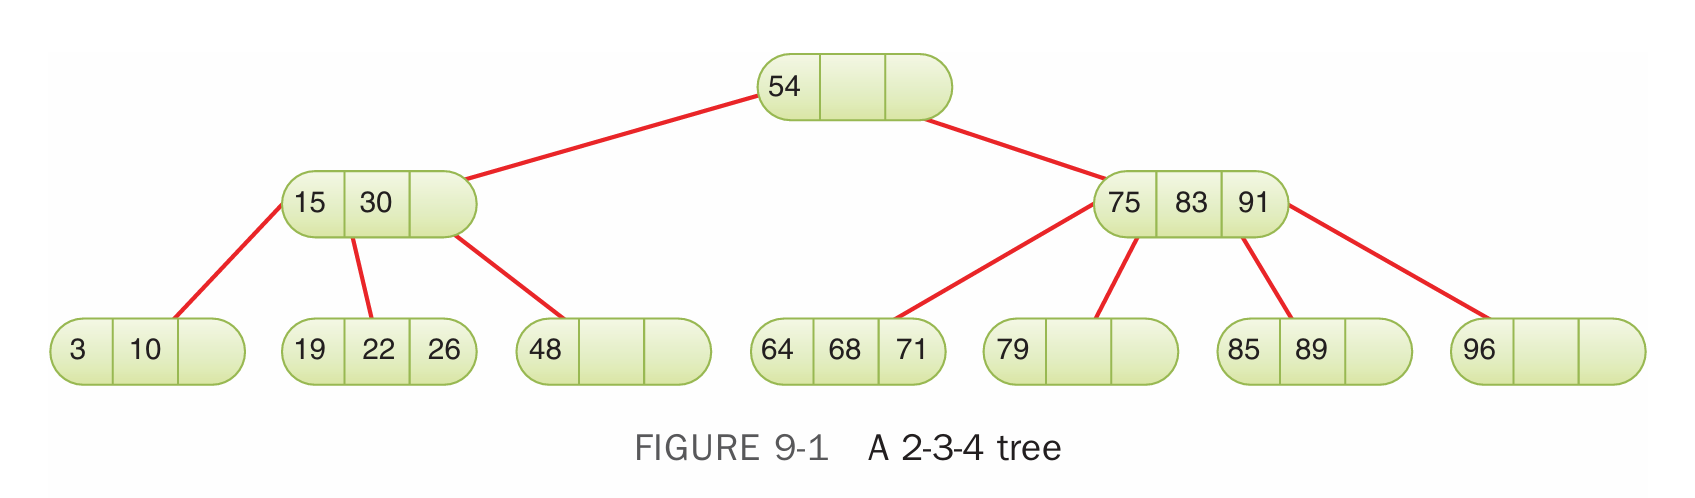

In [11]:
from IPython.display import Image, display
display(Image(filename="picture1.png", width=600))

### Tree organization:

1) All children in the subtree rooted at child 0 have key values less than key 0.

2) All children in the subtree rooted at child 1 have key values greater than key 0 but less than key 1.

3) All children in the subtree rooted at child 2 have key values greater than key 1 but less than key 2.

4) All children in the subtree rooted at child 3 have key values greater than key 2.

### Insertion with no splits

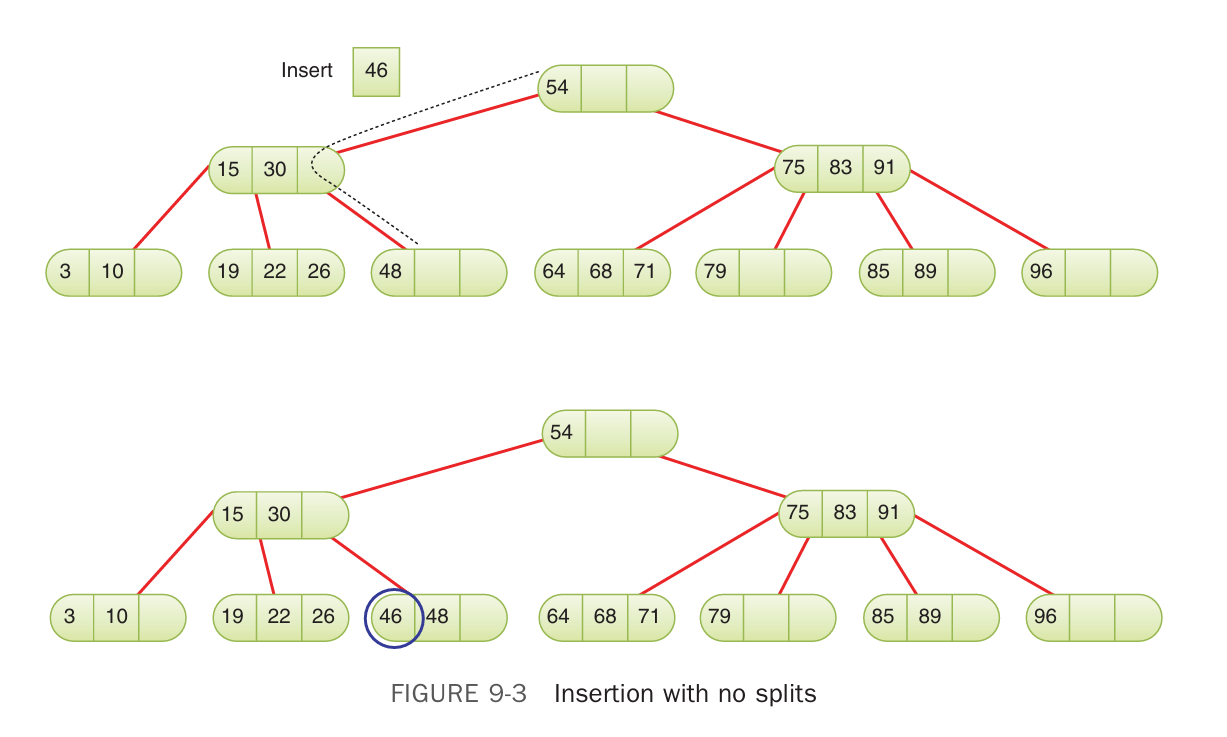

In [10]:
from IPython.display import Image, display
display(Image(filename="picture2.png", width=600))

### Insertion with node splits

1) A new, empty node is created. It’s a sibling of the node being split and will be placed to its right.

2) Data item 2 is moved into the new node.

3) Data item 1 is moved into the parent of the node being split.

4) Data item 0 remains where it is in the node being split.

5) The rightmost two children are disconnected from the node being split and connected to the new node.

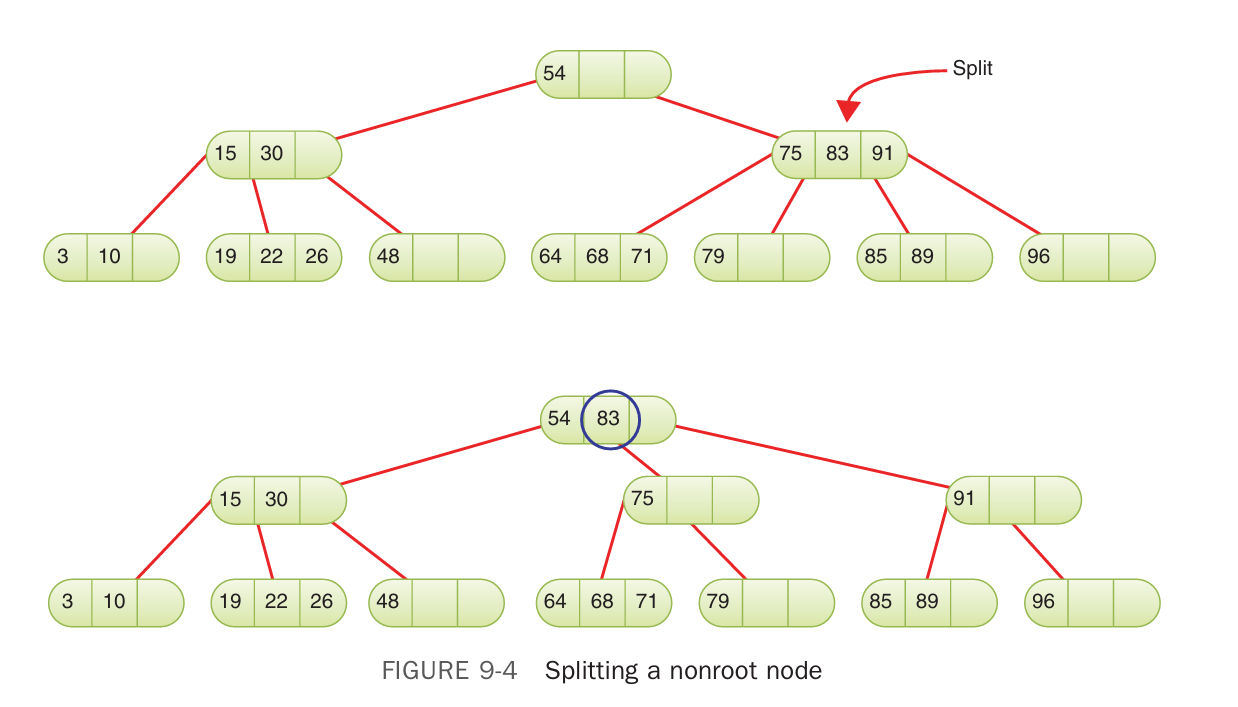

In [9]:
from IPython.display import Image, display
display(Image(filename="picture3.png", width=600))

### Splitting the root

1) A new root node is created. It holds data item 1 of the node being split and becomes the parent of the old root node.

2) A second new node is created. It becomes a sibling of the node being split.

3) Data item 2 of the split root is moved into the new sibling.

4) The old root maintains data item 0 (discarding its references to data items 1 and 2).

5) The two rightmost children of the old root node being split are disconnected from it and connected to the new sibling node.




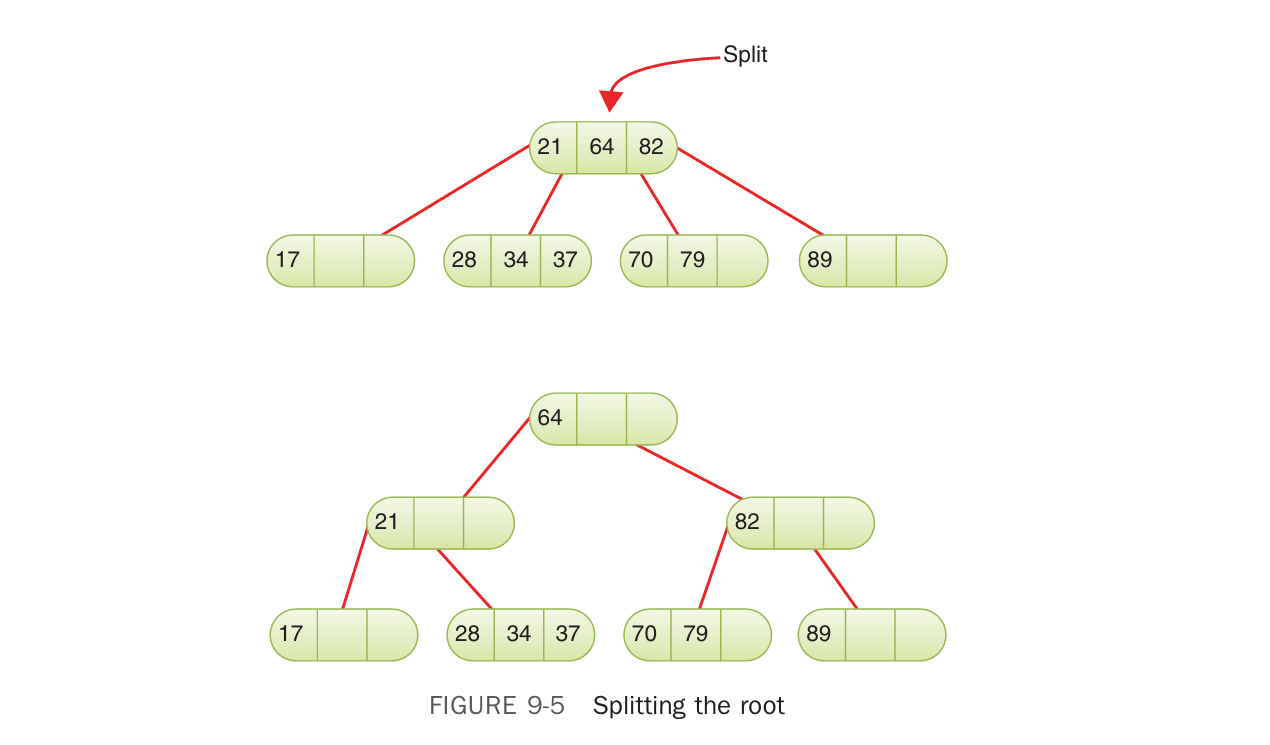

In [12]:
from IPython.display import Image, display
display(Image(filename="picture4.png", width=600))

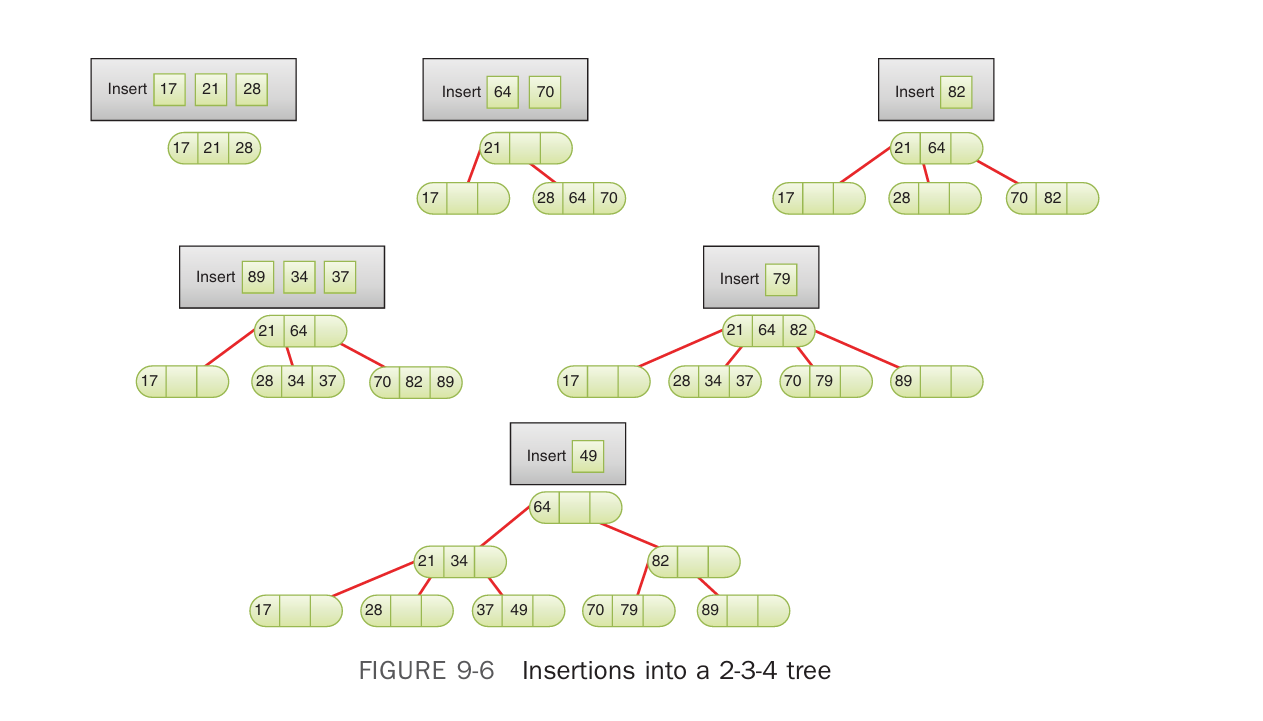

In [15]:
from IPython.display import Image, display
display(Image(filename="picture5.png", width=800))

### **Deletion**

Deleting at Internal Nodes

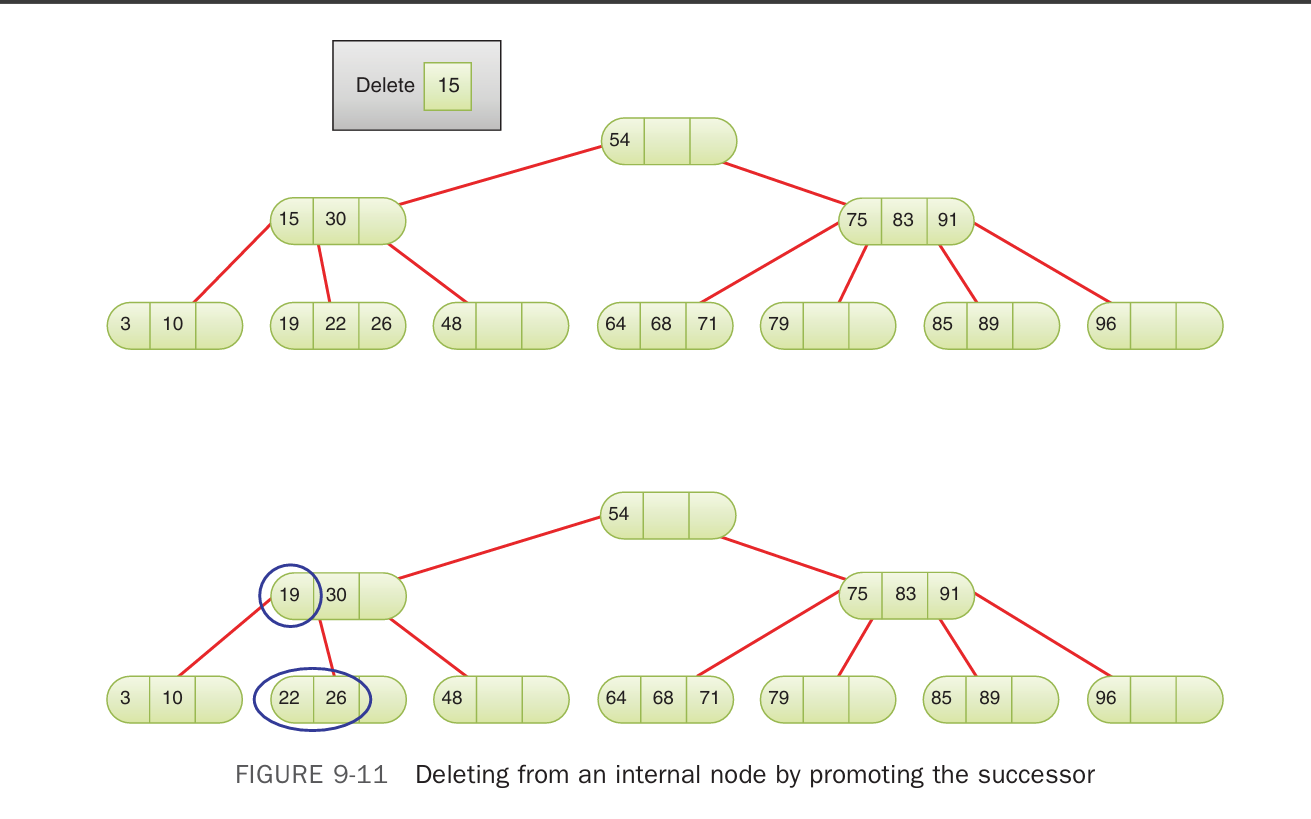

In [2]:
from IPython.display import Image, display
display(Image(filename="picture6.png", width=600))

Deleting from 2 nodes

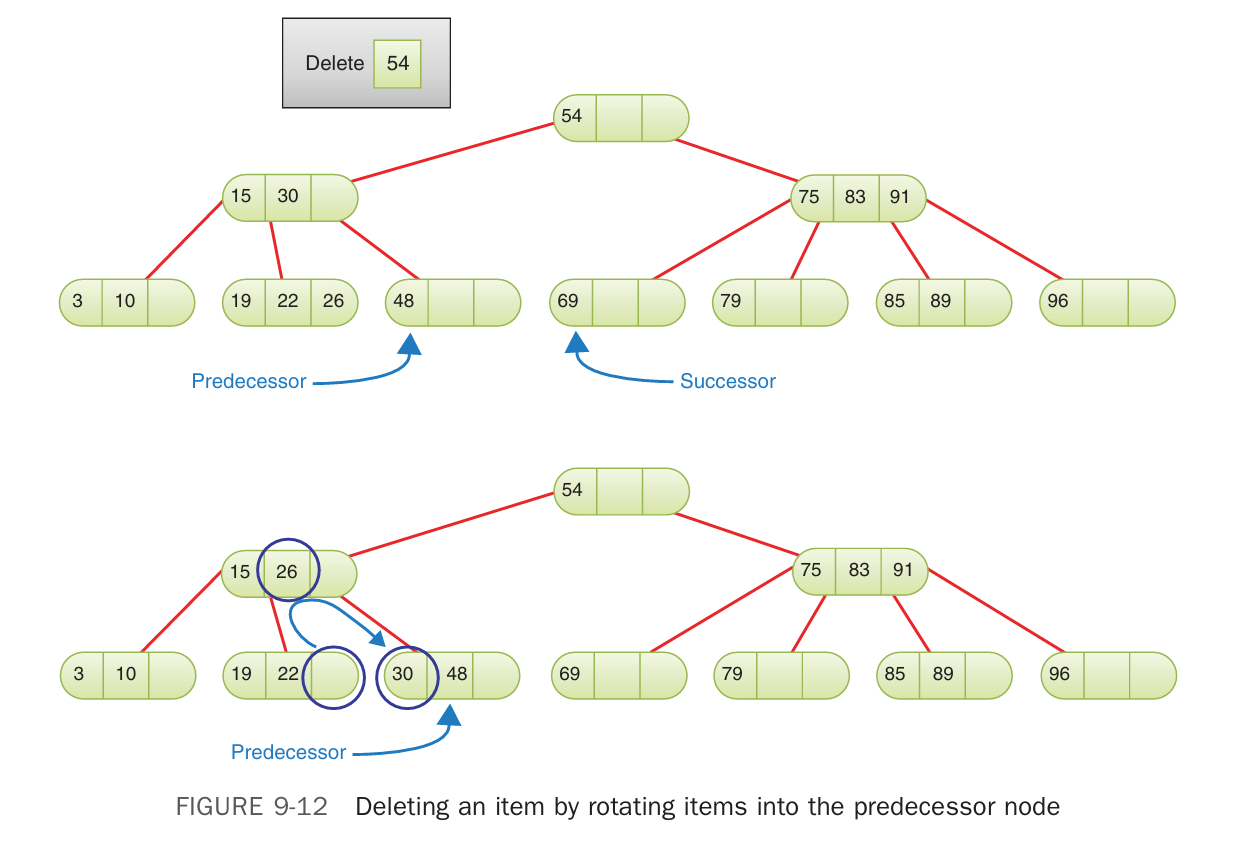

In [5]:
from IPython.display import Image, display
display(Image(filename="picture7.png", width=600))

Moving these two items is called a rotation. The rotation reconfigures the tree without breaking any of the rules of 2-3-4 trees. You still have the items stored in sorted order, and the tree is still balanced. By rotating item 26 up and item 30 down, you’ve created a tree.

What if neither the predecessor nor the successor has a 3-node or 4-node sibling? That’s what happens with the successor of item 54 in Figure 9-12; the successor item has key 69 
and its only sibling is a 2-node containing item 79. Figure 9-13 shows the second technique that applies to this situation


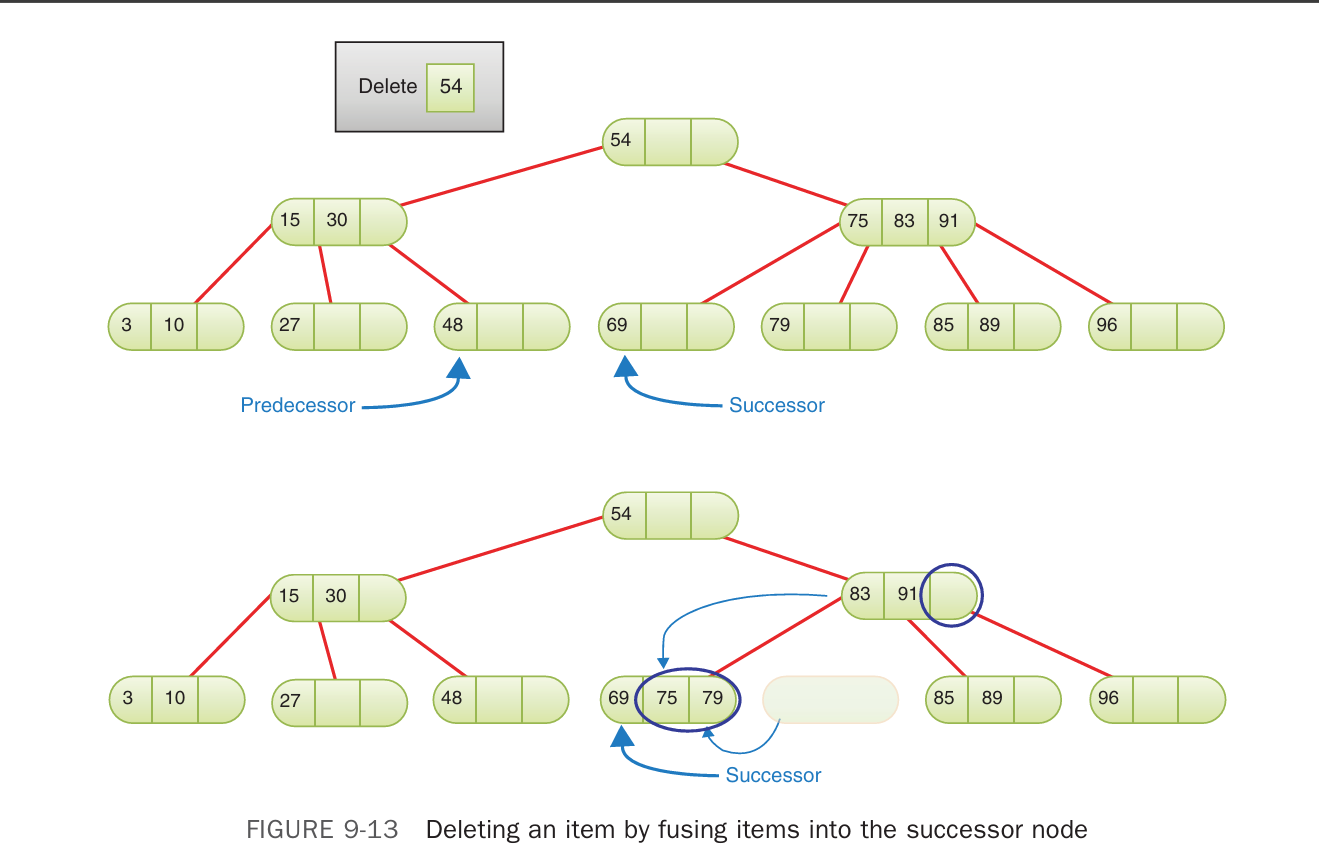

In [7]:
from IPython.display import Image, display
display(Image(filename="picture8.png", width=700))

Fusion

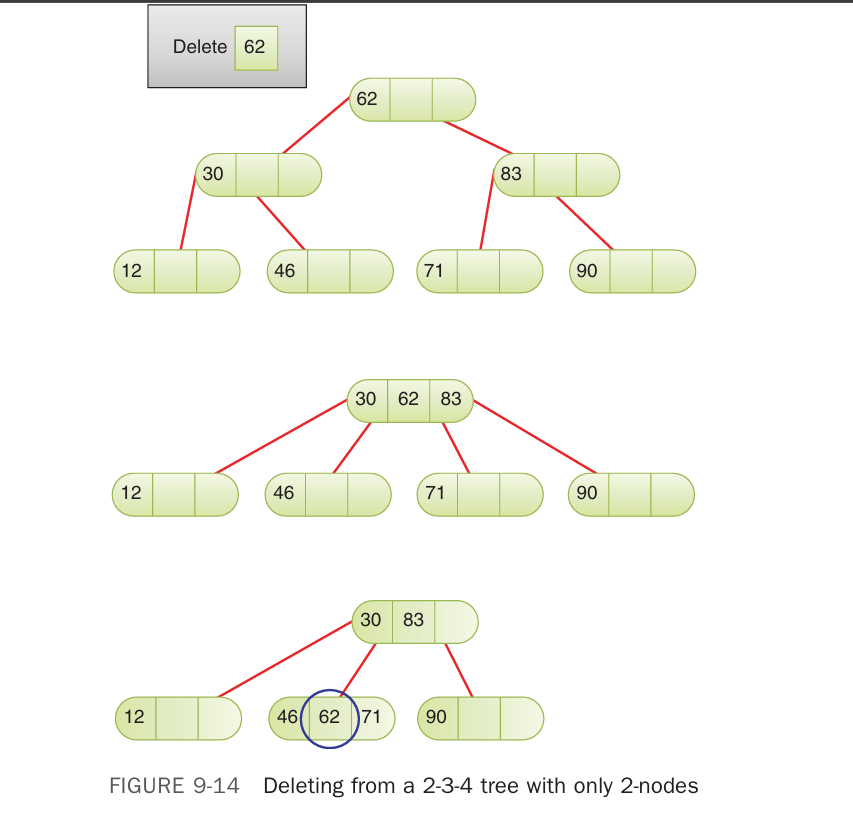

In [8]:
from IPython.display import Image, display
display(Image(filename="picture9.png", width=700))

### Code

In [9]:
# Implement 2-3-4 trees using Tree and Node classes
# Nodes contain up to 3 key-data pairs and up to 4 child links

from LinkStack import *

class Tree234(object):        # A 2-3-4 multiway tree class

   maxLinks = 4               # Maximum number of child links
   maxKeys = maxLinks - 1     # Maximum number of key-value pairs
   
# To preserve node integrity, node keys and children links should
# not be accessible from the caller, so we make the entire
# Node class hidden, but leave its attributes public for ease
# of manipulating them in the Tree class

   class __Node(object):      # A node in a 2-3-4 tree
      def __init__(           # Constructor takes a key-data pair
            self,             # since every node must have 1 item
            key,              # It also takes a list of children,
            data,             # either empty or a pair that must
            *children):       # both be of __Node type.
         valid = [x for x in children # Extract valid child links
                  if isinstance(x, type(self))]
         if len(valid) not in (0, 2): # Check number of children
            raise ValueError(
               "2-3-4 tree nodes must be created with 0 or 2 children")
         self.nKeys = 1       # Exactly 1 key-data pair is kept
         self.keys = [key] * Tree234.maxKeys # Store array of keys
         self.data = [data] * Tree234.maxKeys # Store array of values
         self.nChild = len(valid) # Store number of children
         self.children = (    # Store list of child links
            valid + [None] * (Tree234.maxLinks - len(valid)))

      def __str__(self):      # Represent a node as a string of keys
         return '<Node234 ' + '-'.join( # joined by hyphens w/ prefix
            str(k) for k in self.keys[:self.nKeys]) + '>'
      
      def isLeaf(self):       # Test for leaf nodes
         return self.nChild == 0

      def insertKeyValue(     # Insert a key value pair into the
            self,             # sorted list of keys. If key is already
            key,              # in list, its value will be updated.
            data,             # If key is not in list, add new subtree
            subtree=None):    # if provided, just after the new key
         i = 0                # Start looking at lowest key
         while (i < self.nKeys and # Loop until i points to a key
                self.keys[i] < key): # equal or greater than goal
            i += 1            # Advance to next key
         if i == Tree234.maxKeys: # Check if goal is beyond capacity
            raise Exception(
               'Cannot insert key into full 2-3-4 node')
         if self.keys[i] == key: # If the key is already in keys
            self.data[i] = data # then update value of this key
            return False      # Return flag: no new key added 
         j = self.nKeys       # Otherwise point j at highest key
         if j == Tree234.maxKeys: # Before shifting keys,
            raise Exception(  # raise exception if keys are maxed out
               'Cannot insert key into full 2-3-4 node')
         while i < j:         # Loop over keys higher than key i
            self.keys[j] = self.keys[j-1] # and shift keys, values
            self.data[j] = self.data[j-1] # and children to right
            self.children[j+1] = self.children[j]
            j -= 1            # Advance to lower key
         self.keys[i] = key   # Put new key and value in hole created
         self.data[i] = data  # by shifting array contents
         self.nKeys += 1      # Increment number of keys
         if subtree:          # If a subtree was provided, store it
            self.children[i + 1] = subtree # in hole created
            self.nChild += 1  # This node now has one more child
         return True          # Return flag: a new key was added

   def __init__(              # The 2-3-4 tree organizes items in 
         self):               # nodes by their keys.
      self.__root = None      # Tree starts empty.
   
   def isEmpty(self):         # Check for empty tree
      return self.__root is None

   def root(self):            # Get the data and keys of the root node
      if self.isEmpty():      # If the tree is empty, raise exception
         raise Exception("No root node in empty tree")
      nKeys = self.__root.nKeys # Get active key count
      return (                # Otherwise return root data and key
         self.__root.data[:nKeys], # arrays shortened to current
         self.__root.keys[:nKeys]) # active keys
      
   def __find(self,           # Find a node with a key that matches
              goal,           # the goal and its parent node.
              current, parent, # Start at current and track its parent
              prepare=True):  # Prepare nodes for insertion, if asked
      if current is None:     # If there is no tree left to explore,
         return (current, parent) # then return without finding node
      i = 0                   # Index to keys of current node
      while (i < current.nKeys and # Loop through keys in current
             current.keys[i] < goal): # node to find goal
         i += 1
      if (i < current.nKeys and   # If key i is valid and matches goal
          goal == current.keys[i]):
         return (current, parent) # return current node & parent
      if (prepare and         # If asked to prepare for insertion and
          current.nKeys == Tree234.maxKeys): # node is full,
         current, parent = self.__splitNode( # then split node, update
            current, parent, goal) # current and parent, and adjust i
         i = 0 if goal < current.keys[0] else 1 # for new current
      return ((prepare and current, parent) # Return current if
              if current.isLeaf() else # it's a leaf being prepared
              self.__find(    # Otherwise continue search recursively
                 goal,        # to find goal
                 current.children[i], # in the ith child of current
                 current, prepare))   # and current as parent

   def __splitNode(           # Split a full node during top-down
         self,                # find operation.  
         toSplit,             # Node to split (current)
         parent,              # Parent of node to split (or tree)
         goal):               # Goal key to find
      if toSplit.isLeaf():    # Make new node for Key 2, either as a
         newNode = self.__Node( # leaf node
            toSplit.keys[2],  # with key 2 and value 2 as its
            toSplit.data[2])  # sole key-value pair
      else:
         newNode = self.__Node( # or as an internal node
            toSplit.keys[2],  # with key 2 and value 2 as its
            toSplit.data[2],  # sole key-value pair and the highest
            *toSplit.children[2:toSplit.nChild]) # 2 child links
      toSplit.nKeys = 1       # Only key 0 and data 0 are kept in
      toSplit.nChild = max(   # node to split and child count is
         0, toSplit.nChild - 2) # either 0 or 2
      if parent is self:      # If parent is empty (top of 2-3-4 tree)
         self.__root = self.__Node( # make a new root node
            toSplit.keys[1],  # with key 1 and value 1
            toSplit.data[1],  # and the node to split plus new node
            toSplit, newNode) # as child nodes
         parent = self.__root # New root becomes parent
      else:                   # For existing parent node,
         parent.insertKeyValue( # insert key 1 in parent with 
            toSplit.keys[1],  # new node as its higher subtree
            toSplit.data[1], newNode)
      return (toSplit         # Find resumes at node to split if goal
              if goal < toSplit.keys[1] # is less than key 1
              else newNode,   # else new node
              parent)         # Parent is either new root or same
         
   def search(self, goal):    # Public method to get data associated
      node, p = self.__find(  # with a goal key. First, find node
         goal, self.__root,   # starting at root with self as parent
         self, prepare=False) # without splitting any nodes
      if node:                # If node was found, return appropriate
         return node.data[    # data. It's the first data (index 0) if
            0 if node.nKeys < 2 or # there's only 1 key or
            goal < node.keys[1] else  # if the goal < key 1, else it's
            1 if goal == node.keys[1] # the 2nd data if goal == key 1
            else 2]                   # Otherwise it's the 3rd data

   def insert(self,           # Insert a new key-value pair in a 
              key,            # 2-3-4 tree by finding the node where
              value):         # it belongs, possibly splitting nodes
      node, p = self.__find(  # First, find insertion node for key
         key, self.__root,    # starting at root with self as parent
         self, prepare=True)  # and splitting full nodes
      if node is None:        # If no node was found for insertion
         if p is self:        # Check if the parent is the tree
            self.__root = self.__Node( # Make a root node with just
               key, value)    # 1 key value pair
            return True       # and return True for node creation
         raise Exception(     # If not root, then something is wrong
            '__find did not find 2-3-4 node for insertion')
      return node.insertKeyValue( # Otherwise, insert key in node
         key, value)          # with no subtree, returning insert flag

   def traverse(self,         # Traverse the tree in pre, in, or post
                traverseType="in"): # order based on type
      if traverseType not in [ # Verify traversal type is an
            'pre', 'in', 'post']: # accepted value
         raise ValueError(
            "Unknown traversal type: " + str(traverseType))
      
      stack = Stack()         # Create a stack
      stack.push(self.__root) # Put root node in stack
      
      while not stack.isEmpty(): # While there is work in the stack
         item = stack.pop()   # Get next item
         if isinstance(item, self.__Node): # If it's a tree node
            last = max(       # Find last child or last key index
               item.nChild,   # going 1 past last key for post order
               item.nKeys + (1 if traverseType == 'post' else 0))
            for c in range(last - 1, -1, -1): # Loop in reverse
               if (traverseType == 'post' and # For post-order, push
                   0 < c and c - 1 < item.nKeys): # last data item
                  stack.push((item.keys[c - 1], item.data[c - 1]))
               if (traverseType == 'in' and # For in-order, push
                   c < item.nKeys): # valid data items to yield
                  stack.push((item.keys[c], item.data[c]))
               if c < item.nChild: # For valid child links,
                  stack.push(item.children[c]) # traverse child
               if (traverseType == 'pre' and # For pre-order, push
                   c < item.nKeys): # valid data items to yield
                  stack.push((item.keys[c], item.data[c]))
         elif item:           # Every other non-None item is a
            yield item        # (key, data) pair to be yielded
   
   def print(self,            # Print a tree sideways with 1 key
             indentBy=4):     # on each line and indenting each level
      self.__pTree(self.__root, # by some blanks.  Start at root node
                   "", indentBy) # with no indent
       
   def __pTree(self,          # Recursively print a 2-3-4 subtree,
               node,          # sideways with the root node left 
               indent,        # justified; indent shows its level
               indentBy=4):   # Increase indent level for subtrees
      if node:                # Only print if there is a node
         for c in range(      # Loop through children and keys from 
               max(node.nKeys, node.nChild) - 1, # highest to
               -1, -1):       # lowest
            if c < node.nKeys: # Only print valid keys
               print(indent + str(node) + # Print key and value after
                     ': ' + str(node.keys[c]) + # indent prefix 
                     '->' + str(node.data[c]))
            if c < node.nChild: # Only print valid child subtrees
               self.__pTree(node.children[c],
                            indent + " " * indentBy, indentBy)


In [1]:
import sys
import Tree234

class Tree234(Tree234.Tree234):
    def height(self):
        return self.__height(self.__root)
    
    def __height(self, node):
        return -1 if node is None else 0 if node.isLeaf() else (1 + self.__height(node.children[0]))


# initialize tree
print("TREE INITIALIZATION")
theTree = Tree234()
print(f'Created an empty 2-3-4 tree of height {theTree.height()}')
theTree.print()


# put data into a tree
# use sys.argv only when running as a script
print("INSERTING DATA INTO A TREE")
if len(sys.argv) > 1 and not any('jupyter' in arg for arg in sys.argv):
    keys = [int(a) if a.isdigit() else a for a in sys.argv[1:]]
else:
    keys = [44, 27, 33, 65, 57, 49, 55, 83, 71, 86, 27, 52, 38, 40, 42, 78, 75, 74]


print(f'Inserting {len(keys)} key(s) in the following order:\n {keys}\n')




order = 1
lastHeight = theTree.height()
for i, key in enumerate(keys):
   duplicate = key in keys[:i]
   if not theTree.insert(key, order):
      print('Insert of key', key, 'with data', order,
            'keys updated an existing key',
            'as expected' if duplicate else 'unexpectedly')
   if theTree.height() != lastHeight:
      lastHeight = theTree.height()
      print('Inserting key', key, 'after inserting', i,
            'other key(s) caused height to change to', lastHeight)
   order += 1

print('After inserting', len(keys), 'keys the 2-3-4 tree has height',
      theTree.height(), 'and contains:')
theTree.print()
root_data, root_keys = theTree.root()
print('The tree root node has keys:', root_keys, 'and data:', root_data)

TREE INITIALIZATION
Created an empty 2-3-4 tree of height -1
INSERTING DATA INTO A TREE
Inserting 18 key(s) in the following order:
 [44, 27, 33, 65, 57, 49, 55, 83, 71, 86, 27, 52, 38, 40, 42, 78, 75, 74]

Inserting key 44 after inserting 0 other key(s) caused height to change to 0
Inserting key 65 after inserting 3 other key(s) caused height to change to 1
Insert of key 27 with data 11 keys updated an existing key as expected
Inserting key 27 after inserting 10 other key(s) caused height to change to 2
After inserting 18 keys the 2-3-4 tree has height 2 and contains:
        <Node234 86>: 86->10
    <Node234 71-83>: 83->8
        <Node234 74-75-78>: 78->16
        <Node234 74-75-78>: 75->17
        <Node234 74-75-78>: 74->18
    <Node234 71-83>: 71->9
        <Node234 65>: 65->4
<Node234 57>: 57->5
        <Node234 52-55>: 55->7
        <Node234 52-55>: 52->12
    <Node234 33-40-49>: 49->6
        <Node234 42-44>: 44->1
        <Node234 42-44>: 42->15
    <Node234 33-40-49>: 40->14
 

In [24]:
goals = keys[:len(keys) // 2] + [39 if isinstance(keys[0], int) else '39']
for goal in goals:
   inTree = goal in keys
   found = theTree.search(goal)
   print('Searching for', goal, 'returns', found,
         'as expected' if (isinstance(found, int) if inTree else found is None)
         else 'unexpectedly')

print('Reinserting the same', len(keys), 'keys into the tree...')
for i, key in enumerate(keys):
   if theTree.insert(key, order):
      print('Reinserting key', key, 'with data', order,
            'unexpectedly added a new key to the tree')
   if theTree.height() != lastHeight:
      lastHeight = theTree.height()
      print('Reinserting key', key, 'with value', order, 'after inserting', i,
            'other key(s) caused height to change to', lastHeight)
   order += 1
print('Leaves tree with height', theTree.height(), 'and containing:')
theTree.print()
root_data, root_keys = theTree.root()
print('The tree root node has keys:', root_keys, 'and data:', root_data)



for order in ['pre', 'in', 'post']:
   print('Traversing the tree using', order, 'order')
   for key, data in theTree.traverse(order):
      print('{' + str(key) + ', ' + str(data) + '}', end=' ')
   print()

Searching for 44 returns 1 as expected
Searching for 27 returns 11 as expected
Searching for 33 returns 3 as expected
Searching for 65 returns 4 as expected
Searching for 57 returns 5 as expected
Searching for 49 returns 6 as expected
Searching for 55 returns 7 as expected
Searching for 83 returns 8 as expected
Searching for 71 returns 9 as expected
Searching for 39 returns None as expected
Reinserting the same 18 keys into the tree...
Leaves tree with height 2 and containing:
        <Node234 86>: 86->28
    <Node234 71-83>: 83->26
        <Node234 74-75-78>: 78->34
        <Node234 74-75-78>: 75->35
        <Node234 74-75-78>: 74->36
    <Node234 71-83>: 71->27
        <Node234 65>: 65->22
<Node234 40-57>: 57->23
        <Node234 52-55>: 55->25
        <Node234 52-55>: 52->30
    <Node234 49>: 49->24
        <Node234 42-44>: 44->19
        <Node234 42-44>: 42->33
<Node234 40-57>: 40->32
        <Node234 38>: 38->31
    <Node234 33>: 33->21
        <Node234 27>: 27->29
The tree root n

### **Efficiency of 2-3-4 trees**

### SPEED

More specifically, in 2-3-4 trees there are up to four children per node. A full, single-node 2-3-4 tree has three items and height 0. A full 2-3-4 tree of height 1 has 5 nodes and 15 items. If every node were full, the height of the tree would be proportional to **log4(N)** where **N** is the number of items (not nodes). Thus, the height of a 2-3-4 tree would be about half that of a binary tree, provided that all the nodes were full. Because they aren’t all full, the height of the 2-3-4 tree is somewhere between **log2(N)** and **log2(N)/2**. The reduced height of the 2-3-4 tree somewhat decreases the path to search compared with binary trees.

On the other hand, there are more items to examine in each node along the path, which increases the search time. Examining the data items in the node using a linear search 
multiplies the search time by an amount proportional to M, the average number of items per node. Even if a binary search is used on the sorted keys in a node, you end up with a 
search time proportional to **M × log4(N)** because a binary search only saves one comparison compared to a linear search and only when there are three keys to compare.

Some nodes contain one item, some two, and some three. If you estimate that the average is two, search times will be proportional to **2×log4(N)**. If you convert that to logarithms of base 2, you get **2 × log4(N) = 2 × ½ log2(N) = log2(N)**. Thus, for 2-3-4 trees, the increased number of items per node tends to cancel out the decreased height of the tree. The search times for a 2-3-4 tree and for a balanced binary tree are approximately equal, and are both **O(log N)**.

The story is similar for insertions and deletions. They each descend through the **log4(N)** levels. Both insertions and deletions need to reach the leaf level to do their work. As they descend, the insertion process splits full 4-nodes and the deletion process collapses 2-nodes into 3-nodes or 4-nodes. These operations consume time, but the amount of time does not depend on the number of nodes in the tree; it’s roughly constant for each node along the path. It does depend on the number of items per node, M. The node modifica
tion operations can be thought of as another constant factor, C, which ends up making the time to insert or delete **C × M × log4(N)**. That’s still **O(log N)**.

Traversal, of course, must visit every node, so its overall time is **O(N)**.

### STORAGE REQUIREMENTS

Each node in a 2-3-4 tree contains storage for three keys and references to data items and four references to its children. This space may be in the form of arrays, as shown in 
Tree234.py, or of individual variables. Most 2-3-4 trees, however, do not use all this storage. A 2-node with only one data item will waste 2/3 of the space for data and 1/2 the 
space for children. A 3-node with two data items will waste 1/3 of the space for data and 1/4 of the space for children. If the spaces taken for a key, data, and child reference are identical and there are two data items per node as the average utilization, then 4 of the 6 cells for keys and data are used and 3 of 4 cells for child links are used, on average. That’s 7 of 10 in use and 3 of 10 (30%) wasted.

You might consider using linked lists instead of arrays to hold the child and data references, but the time overhead of the linked list compared with an array, for only three or 
four items, would probably not make this a worthwhile approach.

The number of nodes is not the same as the number of items in a 2-3-4 tree. The number of nodes could be as low as 1/3 the number items if all the nodes are full (4-nodes). 
At the other extreme, there can be only one item per node (2-nodes), so the number of nodes ranges from **N/3** to **N**, with the average expected to be **N/2** items. In Big O notation, you treat all of those as **O(N)**. That also means that the average amount of unused memory is **O(N)**.

As traversals are performed, the algorithm needs to store information for each level of the descent of the tree. This storage can either take the form of recursive calls or an explicit stack of nodes that need to be visited. That stack will grow to the number of levels of the tree, so the memory needed is **O(log N)**. Note that search, insertion, and deletion don’t need recursion (although the implementation of `__find()` in Tree234 did use it); they can be written to follow the chain of pointers without storing the full path back to the root. That means they need only **O(1)** space.

